# PySpark SQL & DataFrames


## Abstracting Data with DataFrames

header=True may be passed to make sure that the method treats the first row as column names.

inferSchema=True may be passed to instruct the DataFrame reader to infer the schema from the data and by doing so, it will attempt to assign the right datatype to each column based on the content.

### RDD to DataFrame


In [11]:
!pip install pyspark

In [12]:
import pyspark as sp
sc = sp.SparkContext.getOrCreate()

In [13]:
sample_list = [('Mona',20), ('Jennifer',34),('John',20), ('Jim',26)]

In [14]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create spark
spark = SparkSession.builder.getOrCreate()

# Print spark
print(spark)

In [15]:
# Create an RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


### Loading CSV into DataFrame


In [16]:
file_path = "people.csv"

In [17]:
# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


## Inspecting data in PySpark DataFrame
Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc.,

In [18]:
# Print the first 10 observations
people_df.show(10)

# Count the number of rows
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---+---------+----------------+------+-------------------+
|_c0|person_id|            name|   sex|      date of birth|
+---+---------+----------------+------+-------------------+
|  0|      100|  Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101|   David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|       Ida Shipp|female|1962-05-24 00:00:00|
|  3|      103|    Joanna Moore|female|2017-03-10 00:00:00|
|  4|      104|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|  5|      105|   David Simmons|  male|1999-12-30 00:00:00|
|  6|      106|   Edward Hudson|  male|1983-05-09 00:00:00|
|  7|      107|    Albert Jones|  male|1990-09-13 00:00:00|
|  8|      108|Leonard Cavender|  male|1958-08-08 00:00:00|
|  9|      109|  Everett Vadala|  male|2005-05-24 00:00:00|
+---+---------+----------------+------+-------------------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_i

## PySpark DataFrame subsetting and cleaning
After data inspection, it is often necessary to clean the data which mainly involves subsetting, renaming the columns, removing duplicated rows etc.,

In [19]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+----------------+------+-------------------+
|            name|   sex|      date of birth|
+----------------+------+-------------------+
|  Penelope Lewis|female|1990-08-31 00:00:00|
|   David Anthony|  male|1971-10-14 00:00:00|
|       Ida Shipp|female|1962-05-24 00:00:00|
|    Joanna Moore|female|2017-03-10 00:00:00|
|  Lisandra Ortiz|female|2020-08-05 00:00:00|
|   David Simmons|  male|1999-12-30 00:00:00|
|   Edward Hudson|  male|1983-05-09 00:00:00|
|    Albert Jones|  male|1990-09-13 00:00:00|
|Leonard Cavender|  male|1958-08-08 00:00:00|
|  Everett Vadala|  male|2005-05-24 00:00:00|
+----------------+------+-------------------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


## Filtering your DataFrame


In [20]:
# Filter people_df to select females
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


## Interacting with DataFrames using PySpark SQL
## Running SQL Queries Programmatically
DataFrames can easily be manipulated using SQL queries in PySpark. The `sql()` function on a SparkSession enables applications to run SQL queries programmatically and returns the result as another DataFrame.

In [21]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



## SQL queries for filtering Table


In [22]:
# Filter the people table to select female sex
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


## Data Visualization in PySpark using DataFrames
Plotting graphs using PySpark DataFrames is done using three methods:
* `pyspark_dist_explore` library: `hist()`, `displot()` and `pandas_histogram()`
* `toPandas()`
* `HandySpark` library

## PySpark DataFrame visualization

The column names of names_df are ['Name', 'Age']


<Axes: ylabel='Name'>

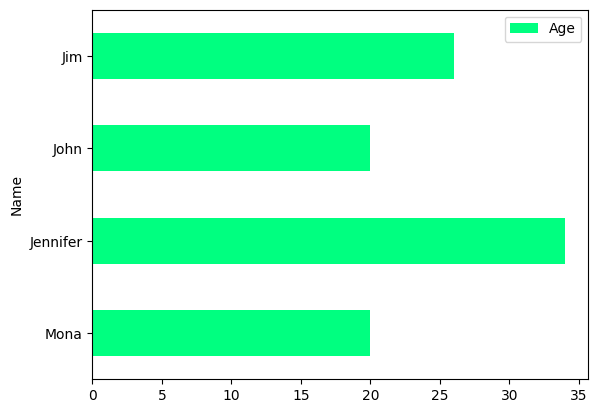

In [23]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame
df_pandas = names_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
# plot.show()